In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob

In [2]:
bank_data = glob.glob("*.csv")
bank_data

['bank-full.csv', 'bank.csv']

In [3]:
bank_full_df = pd.read_csv(bank_data[0], delimiter=";")
bank_full_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# Remapping the feature values into 0 and 1
bank_full_df['y']=bank_full_df['y'].map({'yes':1,'no':0})
bank_full_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [5]:
# Counting the total of 0 and 1 for the target feature
bank_full_df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

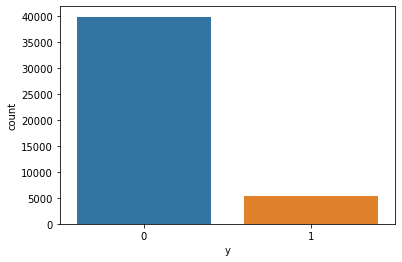

In [6]:
# Plotting a graph for the 0 and 1 ratio from the target feature
sns.countplot(x='y',data=bank_full_df)

In [7]:
# Checking for any null values in the dataframe
bank_full_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer 

In [9]:
# Transforming the predictors categorical values into numerical
column_trans = make_column_transformer(
            (OneHotEncoder(),['job','marital','education','default','housing','loan','contact','month','poutcome']),
             remainder='passthrough')

In [10]:
# Creating a new df with just the predictors
bank_full_X = bank_full_df.drop(columns={'y'})
bank_full_X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [11]:
# Using the column transformation to transform the predictors into numerical
bank_X_full = column_trans.fit_transform(bank_full_X)
bank_X_full

array([[  0.,   0.,   0., ...,   1.,  -1.,   0.],
       [  0.,   0.,   0., ...,   1.,  -1.,   0.],
       [  0.,   0.,   1., ...,   1.,  -1.,   0.],
       ...,
       [  0.,   0.,   0., ...,   5., 184.,   3.],
       [  0.,   1.,   0., ...,   4.,  -1.,   0.],
       [  0.,   0.,   1., ...,   2., 188.,  11.]])

In [12]:
# dataframe with just the response
bank_full_y=bank_full_df['y']
bank_full_y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Splitting the dataset into training and test set
bank_X_train, bank_X_test, bank_y_train, bank_y_test=train_test_split(bank_X_full,bank_full_y,
                                                                     test_size=0.3, random_state=34)

In [15]:
bank_X_train

array([[  0.,   0.,   0., ...,   4.,  -1.,   0.],
       [  0.,   1.,   0., ...,  15.,  -1.,   0.],
       [  0.,   0.,   0., ...,   8.,  -1.,   0.],
       ...,
       [  0.,   0.,   0., ...,   1., 181.,   4.],
       [  0.,   0.,   0., ...,   2., 349.,   2.],
       [  0.,   0.,   0., ...,  10.,  -1.,   0.]])

In [16]:
bank_y_train

16107    0
18756    0
23295    0
20822    0
13812    0
        ..
28406    0
22377    1
43498    1
38010    0
11681    0
Name: y, Length: 31647, dtype: int64

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score

In [18]:
# Performing a range of tree deph to evaluate which tree deph is the the most optimal and prefer choice.
# List of depths range
depth_range=list(range(1,11))

# Accuracy score of training and test data
train_accuracy=[]
test_accuracy=[]

# Classification Error of training and test data
train_error = []
test_error = []

for depth in depth_range:
    # The only change in the parameter is the setting up of random_state in order to secure replicability
    # Apart from random_state, there are no changes in other parameters, everything stays default
    clf = DecisionTreeClassifier(random_state = 51, max_depth = depth)
    clf.fit(bank_X_train,bank_y_train)
    y_pred = clf.predict(bank_X_test)
    
    # performing accuracy score on both the test and training set
    train_accu = accuracy_score(bank_y_train, clf.predict(bank_X_train))
    test_accu = accuracy_score(bank_y_test, y_pred)
    
    train_accuracy.append(train_accu)
    test_accuracy.append(test_accu)
    
    error_train = 1-train_accu
    error_test = 1-test_accu
    
    train_error.append(error_train)
    test_error.append(error_test)
    

In [19]:
train_accuracy

[0.8816001516731444,
 0.8940815875122444,
 0.9001485132871995,
 0.9008752804373242,
 0.9028027933137422,
 0.9067526147818119,
 0.9110500205390716,
 0.916232186305179,
 0.9224887035106013,
 0.9290612064334692]

In [20]:
# Creating new dataframe contains the deph range along with its accuracy score and its error score
tree_error = pd.DataFrame()
tree_error['Tree_Depth'] = depth_range
tree_error['training_error'] = train_error
tree_error['test_error']= test_error
tree_error

,Tree_Depth,training_error,test_error
0,1,0.118400,0.113683
1,2,0.105918,0.099676
2,3,0.099851,0.096137
3,4,0.099125,0.095916
4,5,0.097197,0.095326
5,6,0.093247,0.095989
6,7,0.088950,0.096948
7,8,0.083768,0.098422
8,9,0.077511,0.098349
9,10,0.070939,0.099971


In [21]:
# Melting the dataframe and rearranging the features into more readable format to perform some graph.
Tree_error = pd.melt(tree_error, id_vars=['Tree_Depth'], value_vars=['training_error','test_error'], var_name='Errors',value_name = 'Error Value')
Tree_error

,Tree_Depth,Errors,Error Value
0,1,training_error,0.118400
1,2,training_error,0.105918
2,3,training_error,0.099851
3,4,training_error,0.099125
4,5,training_error,0.097197
5,6,training_error,0.093247
6,7,training_error,0.088950
7,8,training_error,0.083768
8,9,training_error,0.077511
9,10,training_error,0.070939


<Figure size 1440x1152 with 0 Axes>

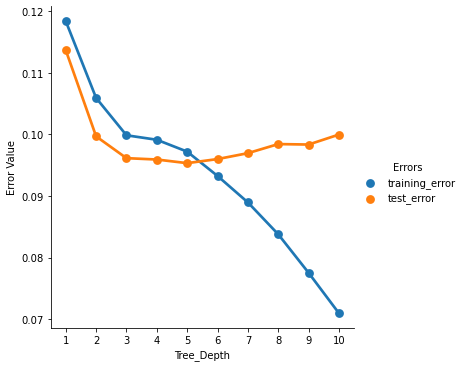

<Figure size 1440x1152 with 0 Axes>

In [22]:
e_plot = sns.catplot(x='Tree_Depth', y='Error Value',hue='Errors',data=Tree_error,kind='point')  # Visualising the training and test errors
plt.figure(figsize=(20,16))

Since tree depth of 5 marks the beginning of rising in error scores, and where the training and test error scores meet. This depth can be considered the preferable deph for this particular data.

In [23]:
# As performed earlier the prefer depth is 5, the only changes is the random state for replicability, other parameters stay default.
# Making a decision tree classifier model and fir the training data
bank_clf_5 = DecisionTreeClassifier(random_state=51, max_depth=5)
bank_clf_5 = bank_clf_5.fit(bank_X_train, bank_y_train)

In [24]:
# Using the training model to predict the test dataset
bank_y_pred=bank_clf_5.predict(bank_X_test)
bank_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
bank_conf2 = pd.DataFrame(bank_y_pred, columns=['Result'])
bank_conf2

,Result
0,0
1,0
2,0
3,0
4,0
...,...
13559,1
13560,0
13561,0
13562,0


In [26]:
# Count the total of 0 and 1 from the prediction
bank_conf2.value_counts()

Result
0         12655
1           909
dtype: int64

In [27]:
# Performing predict proba for the 0 and 1 probability for clients
bank_test_proba = bank_clf_5.predict_proba(bank_X_test, check_input=True)
bank_test_proba

array([[0.97784604, 0.02215396],
       [0.97784604, 0.02215396],
       [0.97784604, 0.02215396],
       ...,
       [0.97784604, 0.02215396],
       [0.97784604, 0.02215396],
       [0.97784604, 0.02215396]])

In [28]:
# Removing the column for 0 and only have the 1 remains
bank_test_score = bank_test_proba[:,1]  
bank_test_score

array([0.02215396, 0.02215396, 0.02215396, ..., 0.02215396, 0.02215396,
       0.02215396])

In [29]:
thresholds=np.linspace(0,1,11)  #set of numbers using to test the threshold
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [31]:
# Checking precision scores and recall scores for a range of thresholds to evaluate the most optimal thresholds
precision_scores=[]
recall_scores=[]

    
for prob in thresholds:
    #Sorting out thresholds values
    bank_test_pred = []
    
    for proba in bank_test_score:
        if proba>prob:
            bank_test_pred.append(1)
        else:
            bank_test_pred.append(0)
    
    precision = precision_score(bank_y_test, bank_test_pred,zero_division=1)
    recall=recall_score(bank_y_test,bank_test_pred)
    
    precision_scores.append(precision)
    recall_scores.append(recall)

In [32]:
precision_scores

[0.11343856025962532,
 0.3314151190164792,
 0.4975206611570248,
 0.5203703703703704,
 0.5845771144278606,
 0.636963696369637,
 0.6845124282982792,
 0.7385159010600707,
 0.7419354838709677,
 0.7419354838709677,
 1.0]

In [33]:
# Grouping the thresholds, precision and recall to compare
bank_thresholds = pd.DataFrame()
bank_thresholds['Thresholds'] = thresholds
bank_thresholds['Precision'] = precision_scores
bank_thresholds['Recall'] = recall_scores
bank_thresholds

,Thresholds,Precision,Recall
0,0.0,0.113439,0.997406
1,0.1,0.331415,0.821660
2,0.2,0.497521,0.585603
3,0.3,0.520370,0.546693
4,0.4,0.584577,0.457198
5,0.5,0.636964,0.375486
6,0.6,0.684512,0.232166
7,0.7,0.738516,0.135538
8,0.8,0.741935,0.014916
9,0.9,0.741935,0.014916


In [34]:
from sklearn.metrics import plot_precision_recall_curve

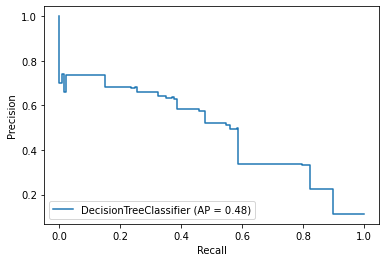

In [35]:
disp = plot_precision_recall_curve(bank_clf_5, bank_X_test, bank_y_test)

In [41]:
target_values = pd.DataFrame()
target_values['test_values']=bank_y_test
target_values.reset_index(drop=True, inplace=True)
target_values

,test_values
0,0
1,0
2,0
3,0
4,0
...,...
13559,1
13560,0
13561,0
13562,0
